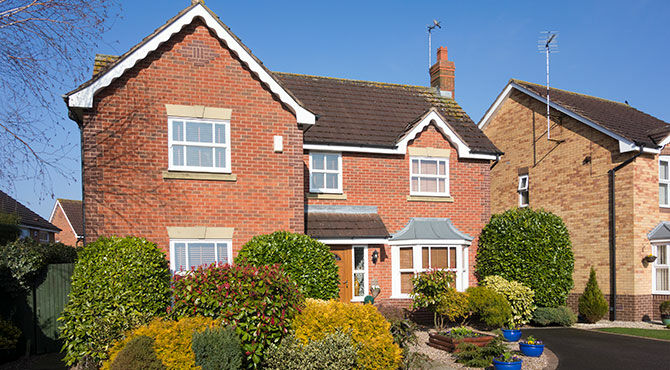

## UK Housing Price with Timeseries

In [40]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import datetime as datetime

%matplotlib inline

##### Data and Exploratory Analysis

In [5]:
##data=dd.read_csv('0 (1).part')

In [41]:
data=pd.read_csv('0 (1).part')

In [65]:
data.head(2)

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,year,month
0,17612922,{BD0D075D-7818-47B3-9657-7651CBD02219},155000,2012-09-28,S,N,F,YORK,YORK,YORK,A,A,2012,9
1,17612923,{0FF70080-C8EA-4DDC-9C19-7651D9B540CC},264000,2012-07-18,D,N,F,HAYLING ISLAND,HAVANT,HAMPSHIRE,A,A,2012,7


In [ ]:
#len(data)

#### Cleaning data

In [43]:
data['year'] = pd.DatetimeIndex(data['Date of Transfer']).year

In [44]:
data['month'] = pd.DatetimeIndex(data['Date of Transfer']).month

In [87]:
data.tail(2)

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,year,month
4876424,22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,2017,2
4876425,22489347,{4C4EE000-291E-1854-E050-A8C063054F34},145000,2017-03-03,T,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,2017,3


In [12]:
d1=data[['Date of Transfer','year','month','Price']].set_index('Date of Transfer')

In [45]:
d1.head()

,year,month,Price
Date of Transfer,,,
2012-09-28,2012,9,155000
2012-07-18,2012,7,264000
2012-04-25,2012,4,20000
2012-10-25,2012,10,89950
2012-04-13,2012,4,168000


In [86]:
d1.isnull().sum()

year     0
month    0
Price    0
dtype: int64

In [46]:
d1['Price'].describe()

count    4.876426e+06
mean     2.836319e+05
std      7.730198e+05
min      1.000000e+00
25%      1.300000e+05
50%      1.959950e+05
75%      3.050000e+05
max      9.890000e+07
Name: Price, dtype: float64

#### Remove Outliers

##### less than £10 Million and greater than £4,000

In [52]:
df = d1.loc[(d1['Price'] < (10000000)) & (d1['Price'] > (4000))]
len(df)

4871127

In [53]:
df.head(2)

,year,month,Price
Date of Transfer,,,
2012-09-28,2012,9,155000
2012-07-18,2012,7,264000


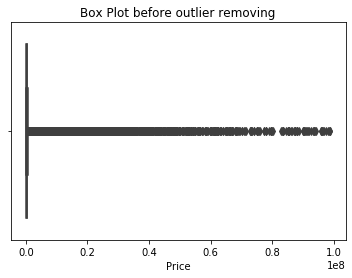

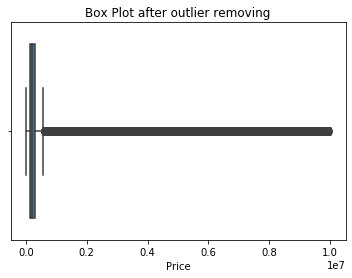

In [54]:
sns.boxplot(d1['Price'])
plt.title("Box Plot before outlier removing")
plt.show()

sns.boxplot(df['Price'])
plt.title("Box Plot after outlier removing")
plt.show()

#### Drop the Duplicates

In [55]:
df1=df.drop_duplicates()

In [56]:
df1.head(1)

,year,month,Price
Date of Transfer,,,
2012-09-28,2012,9,155000


In [57]:
len(df1)

312790

In [29]:
#df1.max()

##### Dataset

In [ ]:
import matplotlib.pyplot as plt

In [78]:
df1.head()

,year,month,Price
Date of Transfer,,,
2012-09-28,2012,9,155000
2012-07-18,2012,7,264000
2012-04-25,2012,4,20000
2012-10-25,2012,10,89950
2012-04-13,2012,4,168000


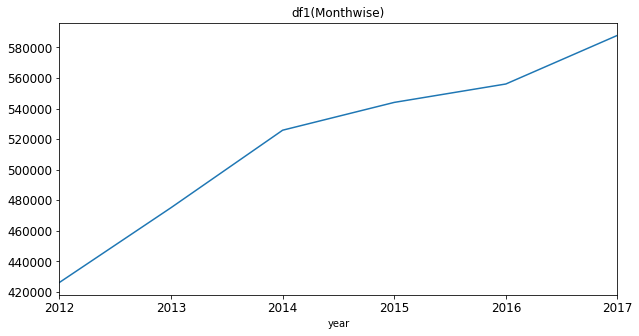

In [59]:
temp = df1.groupby(['year'])['Price'].mean()
temp.plot(figsize=(10,5), title = 'df1(Monthwise)', fontsize = 12)

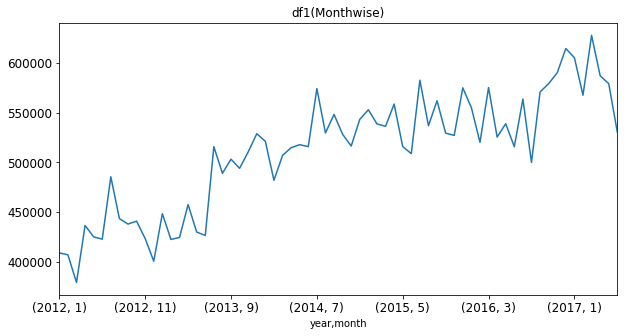

In [92]:
temp = df1.groupby(['year','month'])['Price'].mean()
temp.plot(figsize=(10,5), title = 'df1(Monthwise)', fontsize = 12)

In [ ]:
###### we can clearly see that housing price is significantly increasing every year from the above graph.¶

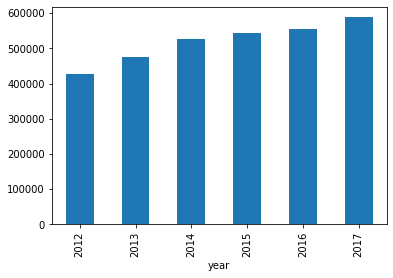

In [60]:
df1.groupby('year')['Price'].mean().plot.bar()

In [61]:
m=df1.groupby('year').agg(('min','max','mean'))['Price']

In [62]:
m.head()

,min,max,mean
year,,,
2012,6000,9880709,426184.473087
2013,4500,9976000,475122.497976
2014,4060,9987169,525815.340166
2015,4135,9999999,544008.349406
2016,4010,9980000,556053.620645


In [63]:
a=m.index
import plotly.graph_objects as go
x=a,
fig=go.Figure(data=[
    go.Bar(name='min', x=a, y=m['min']*100),
    go.Bar(name='max', x=a, y=m['max'])
])

fig.update_layout(barmode='group')
fig.show()